# School-Age Digital Connectivity Data Visualization

This notebook demonstrates different chart types (Bar Chart, Histogram, Pie Chart, Choropleth Map, Heatmap, Box Plot, Scatter Plot) using the dataset **School-Age-Digital-Connectivity**.

We will use the following columns:
- `ISO3` (country code)
- `Countries and areas`
- `Region`
- `Sub-region`
- `Income Group`
- `Total`, `Rural`, `Urban`, `Poorest`, `Richest`


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset (update path after downloading the dataset locally)
df = pd.read_excel(
    "School-Age-Digital-Connectivity-Dataset.xlsx", sheet_name="Total school age"
)
df.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence,Unnamed: 7,Wealth quintile,Unnamed: 9,Source,Unnamed: 11
0,NaN,NaN,NaN,UNICEF Sub-region 1,NaN,NaN,Rural,Urban,Poorest,Richest,Data source,Time period
1,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.237807,0.091202,0.322005,0.005888,0.772502,Multiple Indicator Cluster Survey,2018-19
2,AGO,Angola,SSA,ESA,Lower middle income (LM),0.165507,0.017646,0.243431,0,0.624589,Demographic and Health Survey,2015-16
3,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.398849,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
4,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.809218,0.709329,0.883609,0.46602,0.991219,Demographic and Health Survey,2015-16


In [16]:
df.columns = [
    "ISO3",
    "Countries and areas",
    "Region",
    "Sub-region",
    "Income Group",
    "Total",
    "Rural",
    "Urban",
    "Poorest",
    "Richest",
    "Data source",
    "Time period",
]


df.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural,Urban,Poorest,Richest,Data source,Time period
0,NaN,NaN,NaN,UNICEF Sub-region 1,NaN,NaN,Rural,Urban,Poorest,Richest,Data source,Time period
1,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.237807,0.091202,0.322005,0.005888,0.772502,Multiple Indicator Cluster Survey,2018-19
2,AGO,Angola,SSA,ESA,Lower middle income (LM),0.165507,0.017646,0.243431,0,0.624589,Demographic and Health Survey,2015-16
3,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.398849,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
4,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.809218,0.709329,0.883609,0.46602,0.991219,Demographic and Health Survey,2015-16


## 1. Bar Chart
**Justification**: Compare average connectivity (`Total`) across regions.

**Design Principles**: Clear axis labels, readable colors, and rotation for region names.

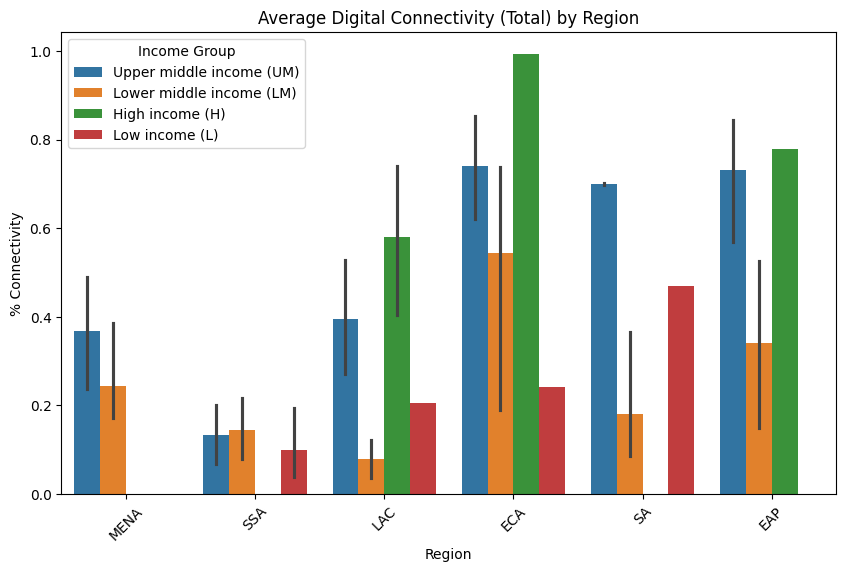

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Region", y="Total", hue="Income Group")
plt.title("Average Digital Connectivity (Total) by Region")
plt.xticks(rotation=45)
plt.ylabel("% Connectivity")
plt.show()

## 2. Histogram
**Justification**: Show distribution of overall digital connectivity (`Total`).

**Design Principles**: Appropriate bins, clear labels, no unnecessary 3D effects.

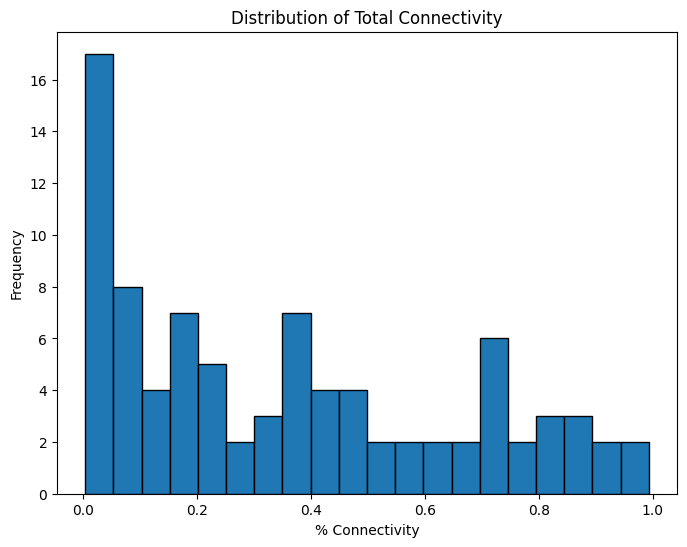

In [32]:
plt.figure(figsize=(8,6))
plt.hist(df["Total"].dropna(), bins=20,  edgecolor="black")
plt.title("Distribution of Total Connectivity")
plt.xlabel("% Connectivity")
plt.ylabel("Frequency")
plt.show()

## 3. Pie Chart
**Justification**: Proportion of countries by `Income Group`.

**Design Principles**: Limit categories, use labels and percentages clearly.

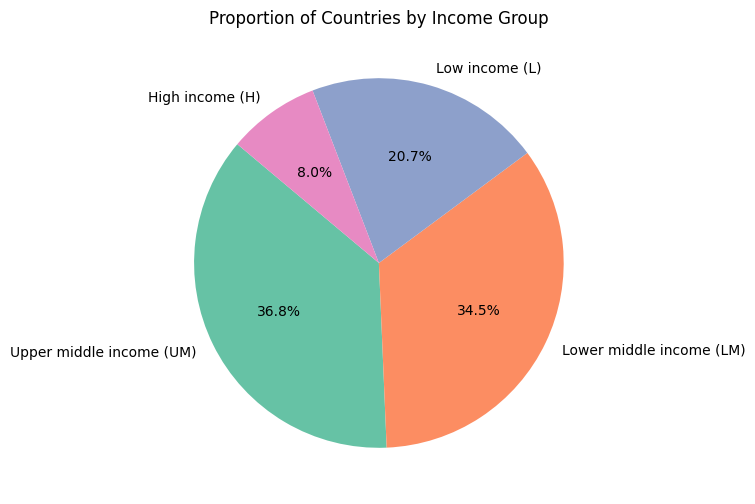

In [19]:
plt.figure(figsize=(6,6))
counts = df["Income Group"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set2"))
plt.title("Proportion of Countries by Income Group")
plt.show()

## 4. Choropleth Map
**Justification**: Spatial distribution of connectivity (`Total`) across countries.

**Design Principles**: Use continuous color scale and include legend for interpretation.

In [28]:
fig = px.choropleth(
    df,
    locations="ISO3",
    color="Total",
    hover_name="Countries and areas",
    color_continuous_scale="Blues",
    title="Global School-Age Digital Connectivity (Total)",
    height=1000,
    width=1800,
)
fig.show()

## 5. Heatmap
**Justification**: Correlation between `Total`, `Rural`, `Urban`, `Poorest`, `Richest`.

**Design Principles**: Annotate values, use diverging palette, and avoid overcrowding.

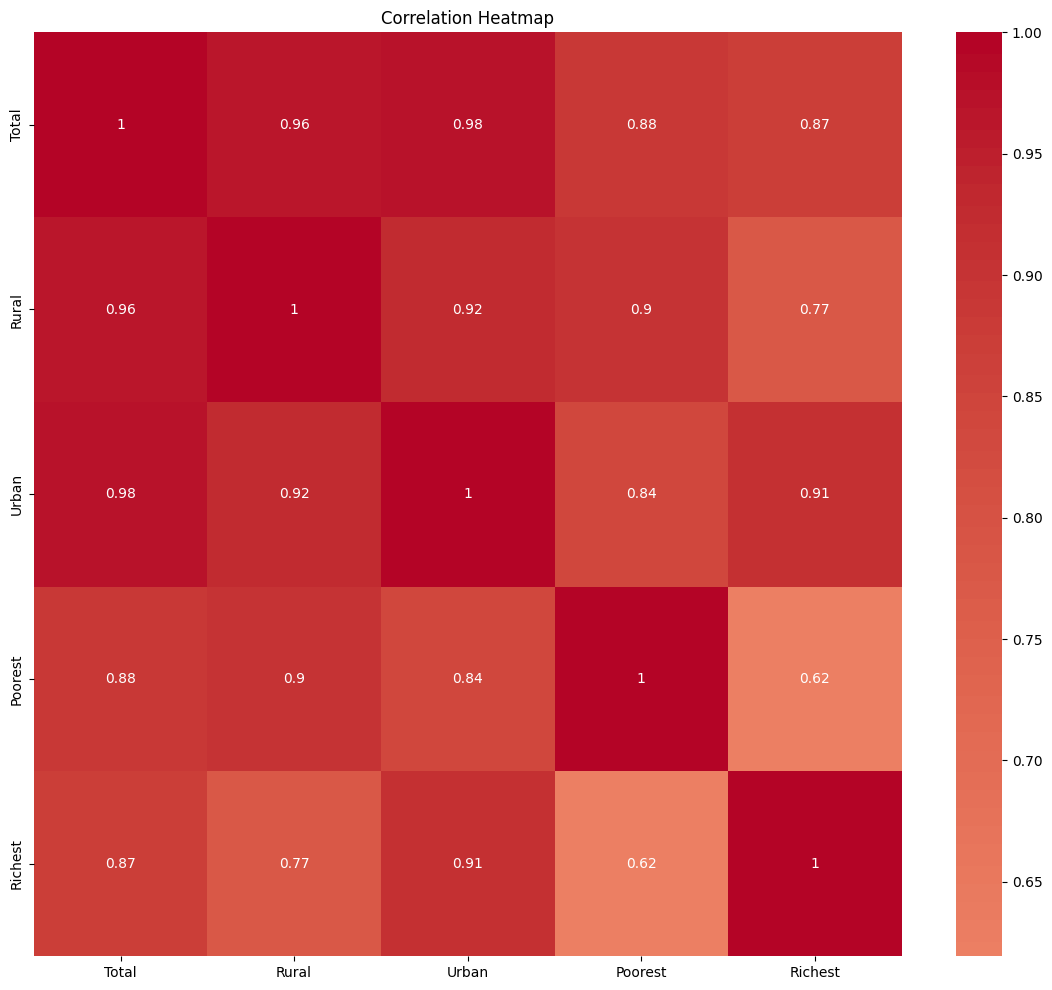

In [30]:
plt.figure(figsize=(14,12))
# Convert columns to numeric, coercing errors to NaN
cols = ["Total", "Rural", "Urban", "Poorest", "Richest"]
df_numeric = df[cols].apply(pd.to_numeric, errors='coerce')
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

## 6. Box Plot
**Justification**: Compare distribution of `Total` connectivity across `Income Group`.

**Design Principles**: Highlight spread and outliers, use clear labels.

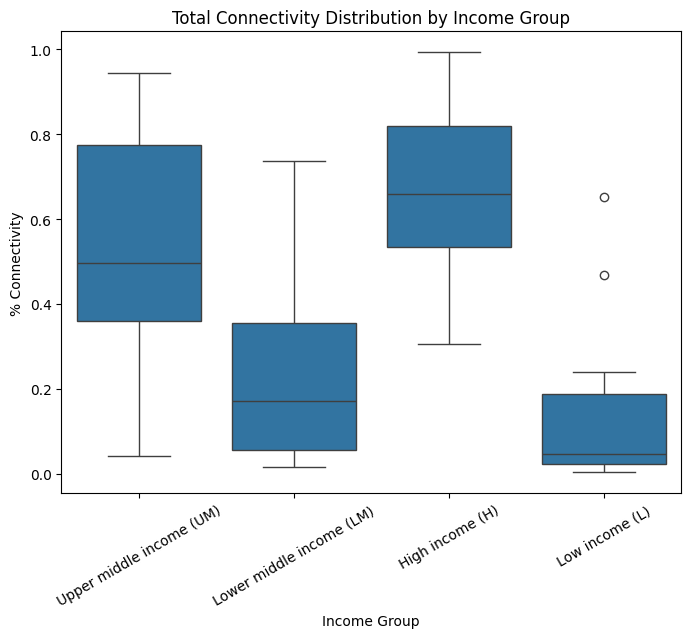

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Income Group", y="Total")
plt.title("Total Connectivity Distribution by Income Group")
plt.xticks(rotation=30)
plt.ylabel("% Connectivity")
plt.show()

## 7. Scatter Plot
**Justification**: Compare `Urban` vs `Rural` connectivity, colored by `Region`.

**Design Principles**: Use meaningful colors, clear axis labels, transparency to avoid overplotting.

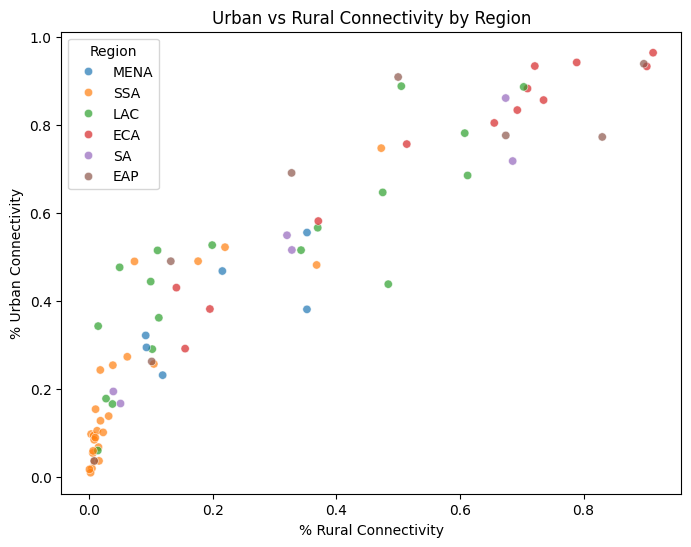

In [23]:
# Convert 'Rural' and 'Urban' columns to numeric, coercing errors to NaN
df["Rural"] = pd.to_numeric(df["Rural"], errors="coerce")
df["Urban"] = pd.to_numeric(df["Urban"], errors="coerce")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Rural", y="Urban", hue="Region", alpha=0.7)
plt.title("Urban vs Rural Connectivity by Region")
plt.xlabel("% Rural Connectivity")
plt.ylabel("% Urban Connectivity")
plt.show()